<a href="https://colab.research.google.com/github/jxie5189/Diabetes_Decision_Tree/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Make Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score



#Import Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Healthcare-Diabetes.csv')

#Dataset Peek

In [ ]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [ ]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.corr()

<ipython-input-19-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Id,1.000000,-0.024222,0.015010,0.009717,0.017702,0.007359,0.024007,-0.009695,-0.007404,-0.006298
Pregnancies,-0.024222,1.000000,0.122839,0.147253,-0.068673,-0.075734,0.018761,-0.027731,0.540805,0.223796
Glucose,0.015010,0.122839,1.000000,0.142095,0.061023,0.323445,0.225308,0.127195,0.256958,0.460644
BloodPressure,0.009717,0.147253,0.142095,1.000000,0.201167,0.087823,0.281560,0.048471,0.238684,0.072900
SkinThickness,0.017702,-0.068673,0.061023,0.201167,1.000000,0.445345,0.393494,0.179830,-0.111895,0.075603
Insulin,0.007359,-0.075734,0.323445,0.087823,0.445345,1.000000,0.215926,0.190500,-0.073458,0.123646
BMI,0.024007,0.018761,0.225308,0.281560,0.393494,0.215926,1.000000,0.129766,0.038175,0.280928
DiabetesPedigreeFunction,-0.009695,-0.027731,0.127195,0.048471,0.179830,0.190500,0.129766,1.000000,0.028544,0.160664
Age,-0.007404,0.540805,0.256958,0.238684,-0.111895,-0.073458,0.038175,0.028544,1.000000,0.237050
Outcome,-0.006298,0.223796,0.460644,0.072900,0.075603,0.123646,0.280928,0.160664,0.237050,1.000000


#Assign Outcome to either Diabets(1) or NO Diabetes(0)

In [ ]:
df['Diabetes'] = np.where(df['Outcome']==1, 'Diabetes', 'No Diabetes')

#Split Train and Test set based on Glucose, BMI, and Age only


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[['Glucose', 'BMI', 'Age']], df['Diabetes'], test_size=0.2, random_state=45)

In [ ]:
x_train.head()

,Glucose,BMI,Age
1307,129,36.4,32
2145,112,37.8,41
1749,139,22.1,21
462,74,35.3,39
388,144,32.0,58


In [ ]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)


In [ ]:
len(x_train)

2214

In [ ]:
len(y_train)

2214

#Make Decision Tree with no limit on max_depth

In [ ]:
tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=45)

tree_clf.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=45)

#Tree's max depth

In [ ]:
tree_clf.get_depth()

22

#Test Set accuracy with all different depth size

In [ ]:
x = np.asarray(x_test)
y = np.asarray(y_test)

max_depth = tree_clf.get_depth()

accuracy={'Depth':[], 'Accuracy':[]}
accuracy_df = pd.DataFrame(accuracy)

for depth in range(2, max_depth+1):
  tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=45, max_depth=depth)
  tree_clf.fit(x_train,y_train)
  pred = tree_clf.predict(x)
  accuracy = accuracy_score(y, pred)
  accuracy_df.loc[len(accuracy_df)] = [depth, accuracy]


In [ ]:
accuracy_df

,Depth,Accuracy
0,2.0,0.770758
1,3.0,0.759928
2,4.0,0.776173
3,5.0,0.790614
4,6.0,0.790614
5,7.0,0.830325
6,8.0,0.859206
7,9.0,0.884477
8,10.0,0.902527
9,11.0,0.920578


#Graph Accuracy

<Axes: >

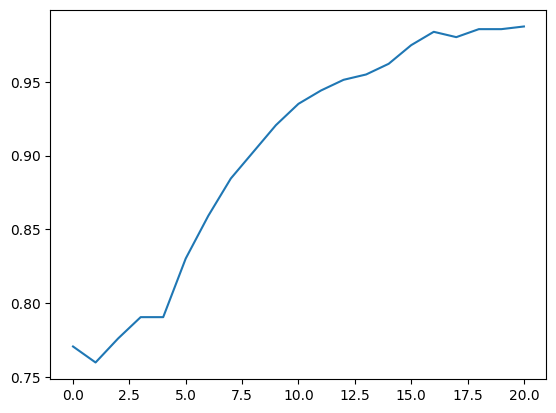

In [ ]:
accuracy_df['Accuracy'].plot()

#Make Model based on reasonable depth, 4, for a simple model

In [ ]:
tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=45, max_depth=4)

tree_clf.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=45)

In [ ]:
pred = tree_clf.predict(x)

accuracy = accuracy_score(y, pred)

#Model's accuracy based on depth of 4 and glucose, bmi, and age feature

In [ ]:
accuracy

0.776173285198556

#make Decision Tree graph
with depth of 4 and glucose, bmi, and age feature only

In [ ]:
export_graphviz(
    tree_clf,
    out_file='DM_tree.dot',
    feature_names = np.asarray(x_test.columns),
    class_names = ['Diabetes', 'No Diabetes'],
    rounded=True,
    filled=True
)

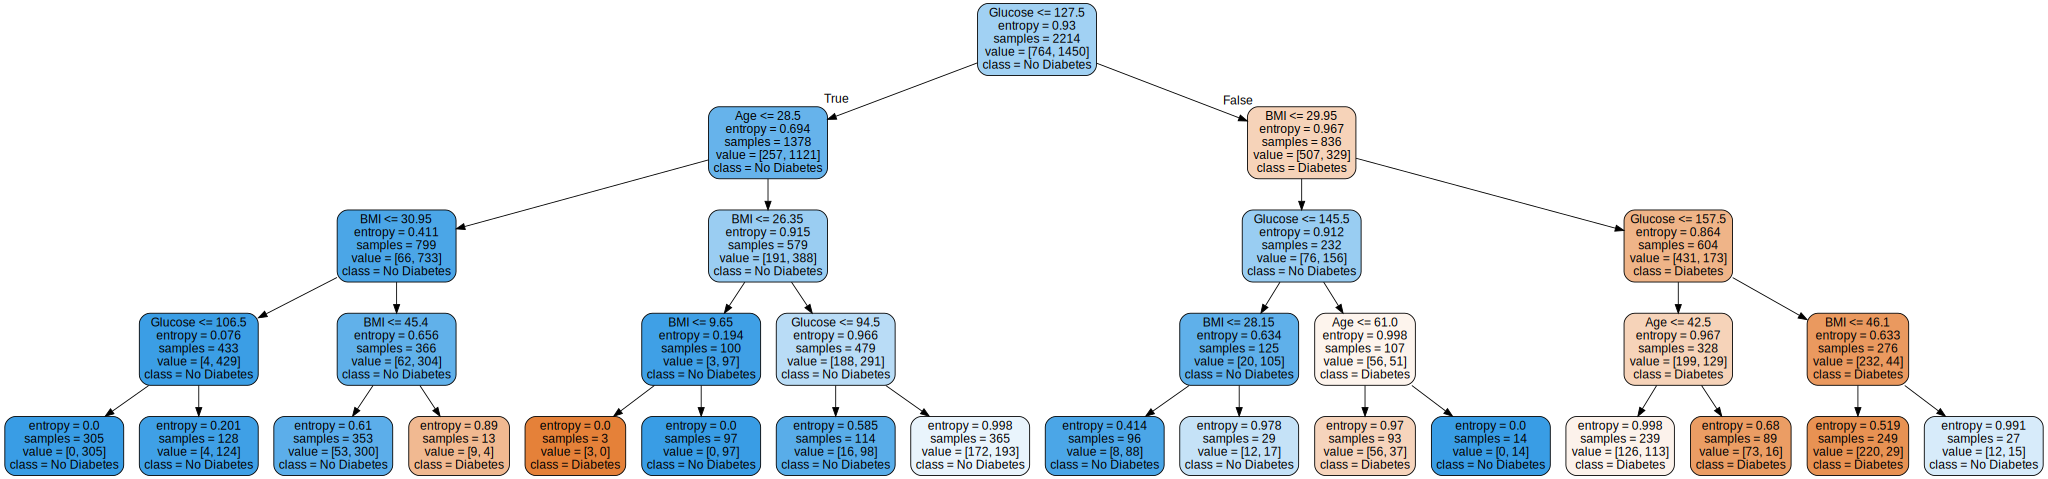

In [ ]:
Source.from_file('DM_tree.dot')
# s = Source.from_file('DM_tree.dot')
# #print(s)
# s.render('DM_tree.gv', format = 'jpg', view = True)

#Make Model

In [ ]:
class model:

  def takeEntry(self, entry):
    self.glucose = entry.glucose
    self.bmi = entry.bmi
    self.age = entry.age
    self.x = np.array([[self.glucose, self.bmi, self.age]])

  def pred(self):

    dm_precentage = self.pred_prob()[0][0]*100
    nonDm_precentage = self.pred_prob()[0][1]*100
    return print('There is {:.2f}% of diabetes and {:.2f}% of no diabetes according to our model'.format(dm_precentage, nonDm_precentage))

  def pred_prob(self):
    return tree_clf.predict_proba(self.x)


In [ ]:
class entry:
  def __init__(self, glucose, bmi, age):
    self.glucose = glucose
    self.bmi = bmi
    self.age = age


#Demo with current unaltered dataset
Decision tree is with glucose, bmi, and age feature with depth of 4

In [ ]:
tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=45, max_depth=4)
tree_clf.fit(x_train,y_train)

#controlling fo glucose, age
demo_1 = entry(100, 22, 25) #input 1 for assignment
demo_2 = entry(100, 42, 25) #input 2 for assignment

#controlling for bmi, and age
demo_3 = entry(150, 22, 25) #input 3 for assigment
demo_4 = entry(100, 22, 25)

#controlling for glucose and bmi
demo_5 = entry(100, 22, 25)
demo_6 = entry(100, 22, 60)

DMpredictor = model()

DMpredictor.takeEntry(demo_1)
DMpredictor.pred()
print()

DMpredictor.takeEntry(demo_2)
DMpredictor.pred()
print()

DMpredictor.takeEntry(demo_3)
DMpredictor.pred()
print()

DMpredictor.takeEntry(demo_4)
DMpredictor.pred()
print()

DMpredictor.takeEntry(demo_5)
DMpredictor.pred()
print()

DMpredictor.takeEntry(demo_6)
DMpredictor.pred()
print()


There is 0.00% of diabetes and 100.00% of no diabetes according to our model

There is 15.01% of diabetes and 84.99% of no diabetes according to our model

There is 60.22% of diabetes and 39.78% of no diabetes according to our model

There is 0.00% of diabetes and 100.00% of no diabetes according to our model

There is 0.00% of diabetes and 100.00% of no diabetes according to our model

There is 0.00% of diabetes and 100.00% of no diabetes according to our model



#Model accuracy rate from test dataset

In [ ]:
pred = tree_clf.predict(x)

accuracy = accuracy_score(y, pred)

accuracy

0.776173285198556

#Changing the dataset
decreasing the weight of bmi by 50%

In [ ]:
df_copy = df.copy(deep=True)

In [ ]:
df_copy.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetes
0,1,6,148,72,35,0,33.6,0.627,50,1,Diabetes
1,2,1,85,66,29,0,26.6,0.351,31,0,No Diabetes
2,3,8,183,64,0,0,23.3,0.672,32,1,Diabetes
3,4,1,89,66,23,94,28.1,0.167,21,0,No Diabetes
4,5,0,137,40,35,168,43.1,2.288,33,1,Diabetes


In [ ]:
df_copy['BMI'] = df_copy['BMI']*0.5

In [ ]:
df_copy.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetes
0,1,6,148,72,35,0,16.80,0.627,50,1,Diabetes
1,2,1,85,66,29,0,13.30,0.351,31,0,No Diabetes
2,3,8,183,64,0,0,11.65,0.672,32,1,Diabetes
3,4,1,89,66,23,94,14.05,0.167,21,0,No Diabetes
4,5,0,137,40,35,168,21.55,2.288,33,1,Diabetes


#Split to Train/Test set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_copy[['Glucose', 'BMI', 'Age']], df_copy['Diabetes'], test_size=0.2, random_state=45)

In [ ]:
tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=45)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=45)

In [ ]:
tree_clf.get_depth()

22

In [ ]:
x = np.asarray(x_test)
y = np.asarray(y_test)

max_depth = tree_clf.get_depth()

accuracy={'Depth':[], 'Accuracy':[]}
accuracy_df = pd.DataFrame(accuracy)

for depth in range(2, max_depth+1):
  tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=45, max_depth=depth)
  tree_clf.fit(x_train,y_train)
  pred = tree_clf.predict(x)
  accuracy = accuracy_score(y, pred)
  accuracy_df.loc[len(accuracy_df)] = [depth, accuracy]

In [ ]:
accuracy_df

,Depth,Accuracy
0,2.0,0.770758
1,3.0,0.759928
2,4.0,0.776173
3,5.0,0.790614
4,6.0,0.790614
5,7.0,0.830325
6,8.0,0.859206
7,9.0,0.884477
8,10.0,0.902527
9,11.0,0.920578


#Demo under changed Dataset

In [ ]:
tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=45, max_depth=4)
tree_clf.fit(x_train,y_train)


demo_1 = entry(100, 22, 25)
demo_2 = entry(100, 42, 25)

demo_3 = entry(150, 22, 25)
demo_4 = entry(100, 22, 25)

demo_5 = entry(100, 22, 25)
demo_6 = entry(100, 22, 60)

DMpredictor = model()

DMpredictor.takeEntry(demo_1)
DMpredictor.pred()

DMpredictor.takeEntry(demo_2)
DMpredictor.pred()

DMpredictor.takeEntry(demo_3)
DMpredictor.pred()

DMpredictor.takeEntry(demo_4)
DMpredictor.pred()

DMpredictor.takeEntry(demo_5)
DMpredictor.pred()

DMpredictor.takeEntry(demo_6)
DMpredictor.pred()

There is 15.01% of diabetes and 84.99% of no diabetes according to our model
There is 69.23% of diabetes and 30.77% of no diabetes according to our model
There is 52.72% of diabetes and 47.28% of no diabetes according to our model
There is 15.01% of diabetes and 84.99% of no diabetes according to our model
There is 15.01% of diabetes and 84.99% of no diabetes according to our model
There is 47.12% of diabetes and 52.88% of no diabetes according to our model


In [ ]:
pred = tree_clf.predict(x)

accuracy = accuracy_score(y, pred)

accuracy

0.776173285198556

In [ ]:
export_graphviz(
    tree_clf,
    out_file='DM_tree2.dot',
    feature_names = np.asarray(x_test.columns),
    class_names = ['Diabetes', 'No Diabetes'],
    rounded=True,
    filled=True
)

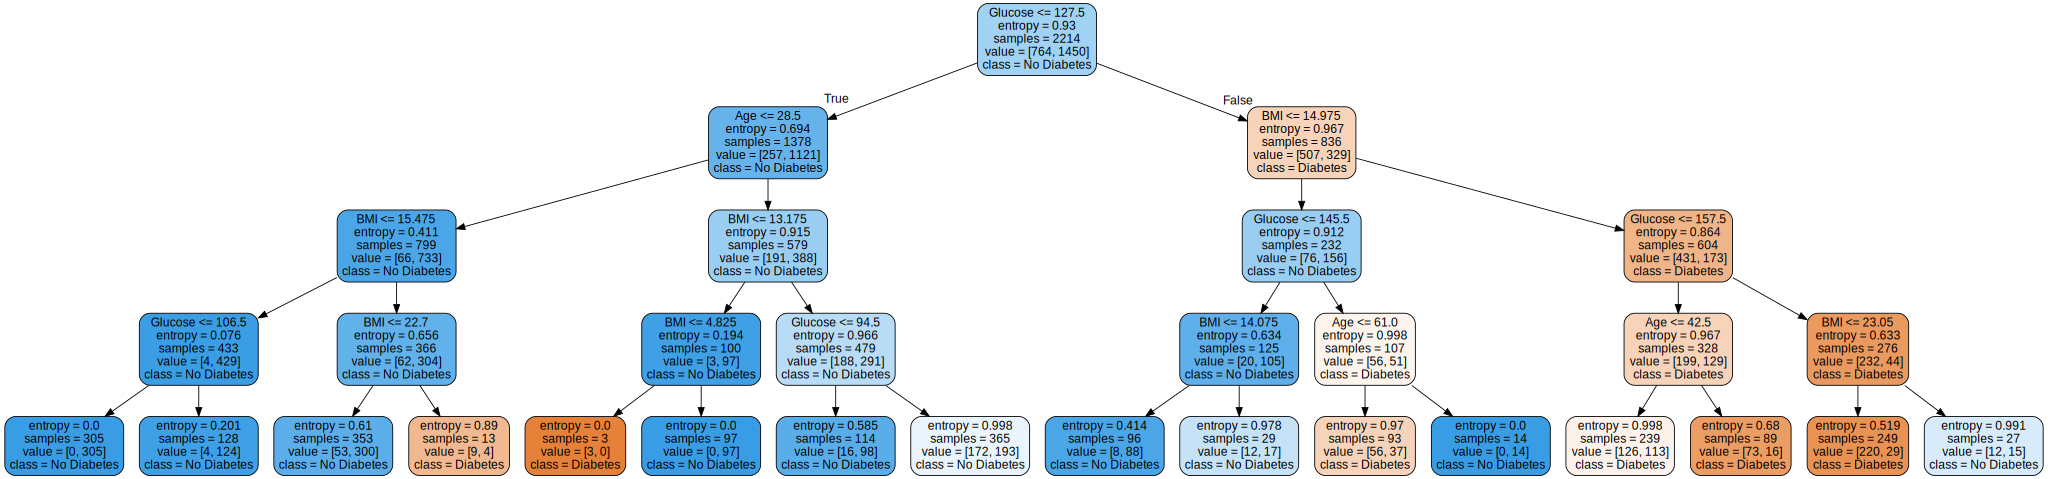

In [ ]:
Source.from_file('DM_tree2.dot')

#Inconsistent Dataset

In [ ]:
df_wted = df.copy(deep=True)

In [ ]:
#df_wted.loc[df_wted['Outcome']==1, 'BMI'] = df['BMI']*0.5

In [ ]:
df_wted.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetes
0,1,6,148,72,35,0,33.6,0.627,50,1,Diabetes
1,2,1,85,66,29,0,26.6,0.351,31,0,No Diabetes
2,3,8,183,64,0,0,23.3,0.672,32,1,Diabetes
3,4,1,89,66,23,94,28.1,0.167,21,0,No Diabetes
4,5,0,137,40,35,168,43.1,2.288,33,1,Diabetes


In [ ]:
train_set, test_set = train_test_split(df_wted, test_size=0.2, random_state=45)

In [ ]:
train_set.loc[train_set['Outcome']==1, 'BMI'] = df['BMI']*0.5

In [ ]:
train_set.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetes
1307,1308,3,129,92,49,155,18.2,0.968,32,1,Diabetes
2145,2146,5,112,66,0,0,18.9,0.261,41,1,Diabetes
1749,1750,0,139,62,17,210,22.1,0.207,21,0,No Diabetes
462,463,8,74,70,40,49,35.3,0.705,39,0,No Diabetes
388,389,5,144,82,26,285,16.0,0.452,58,1,Diabetes


In [ ]:
tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=45, max_depth=4)

x_train = np.asarray(train_set[['Glucose', 'BMI', 'Age']])
y_train = np.asarray(train_set['Outcome'])

tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=45)

In [ ]:
#tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=45, max_depth=4)
#tree_clf.fit(x_train,y_train)

demo_1 = entry(100, 22, 25)
demo_2 = entry(100, 42, 25)

demo_3 = entry(150, 22, 25)
demo_4 = entry(100, 22, 25)

demo_5 = entry(100, 22, 25)
demo_6 = entry(100, 22, 60)

DMpredictor = model()

DMpredictor.takeEntry(demo_1)
DMpredictor.pred()

DMpredictor.takeEntry(demo_2)
DMpredictor.pred()

DMpredictor.takeEntry(demo_3)
DMpredictor.pred()

DMpredictor.takeEntry(demo_4)
DMpredictor.pred()

DMpredictor.takeEntry(demo_5)
DMpredictor.pred()

DMpredictor.takeEntry(demo_6)
DMpredictor.pred()

There is 98.55% of diabetes and 1.45% of no diabetes according to our model
There is 100.00% of diabetes and 0.00% of no diabetes according to our model
There is 4.55% of diabetes and 95.45% of no diabetes according to our model
There is 98.55% of diabetes and 1.45% of no diabetes according to our model
There is 98.55% of diabetes and 1.45% of no diabetes according to our model
There is 83.33% of diabetes and 16.67% of no diabetes according to our model


In [ ]:
x = np.asarray(test_set[['Glucose', 'BMI', 'Age']])
y = np.asarray(test_set['Outcome'])

pred = tree_clf.predict(x)

accuracy = accuracy_score(y, pred)

accuracy

0.6642599277978339

In [ ]:
export_graphviz(
    tree_clf,
    out_file='DM_tree3.dot',
    feature_names = np.asarray(x_test.columns),
    class_names = ['Diabetes', 'No Diabetes'],
    rounded=True,
    filled=True
)

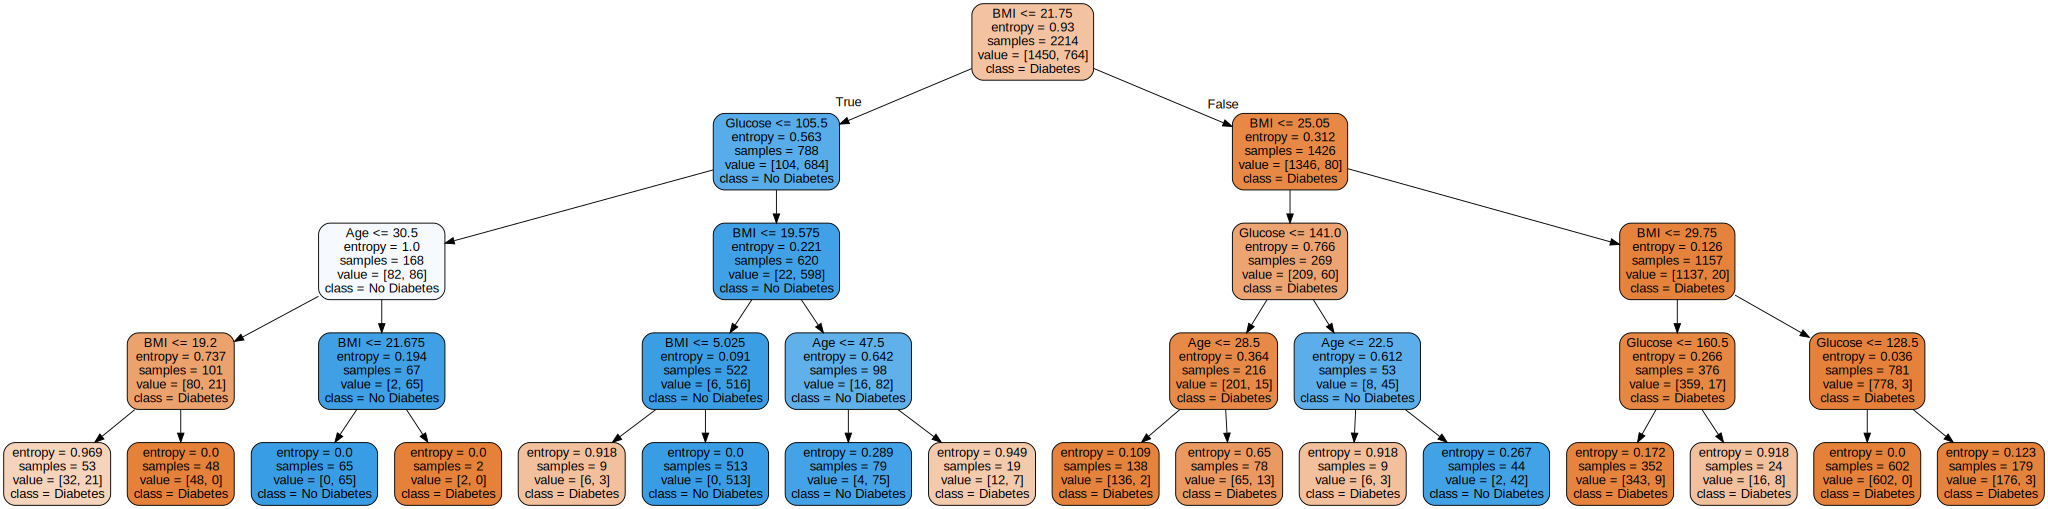

In [ ]:
Source.from_file('DM_tree3.dot')